In [33]:
import matplotlib.pyplot as plt
import numpy as np

import pyfits, time, itertools, random, os, sys, glob, re

%matplotlib inline

# HARPS 

http://archive.eso.org/wdb/wdb/adp/phase3_main/form

**Reduced or fully calibrated data sets**

In [89]:
#Reading in a file and displaying available data

hdu = pyfits.open("Spectra/GJ176/ADP.2014-09-16T11:03:31.980.fits")
hdu.info()

Filename: Spectra/GJ176/ADP.2014-09-16T11:03:31.980.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    3051   ()              
1    SPECTRUM    BinTableHDU     46   1R x 3C      [313127D, 313127E, 313127E]   


In [90]:
#Displaying header of SPECTRUM

hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   
DATE    = '2010-08-05T17:04:25.679' / Date this file was written                
INSTRUME= 'HARPS   '           / Instrument used                                
RA      =            70.736630 / 04:42:56.7 RA (J2000) pointing                 
DEC     =             18.95634 / 18:57:22.8 DEC (J2000) pointing                
EQUINOX =                2000. / Standard FK5 (years)                           
RADECSYS= 'FK5     '           / Coordinate reference frame                     
EXPTIME =             900.00

In [91]:
#Data structured as follows:

wavelength = hdu[1].data[0][0]
flux = hdu[1].data[0][1]
error = hdu[1].data[0][2]

#print(hdu[1].data)

(-30, 400)

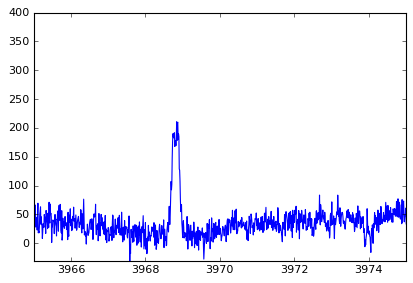

In [95]:
#plt.figure()
plt.plot(wavelength,flux)
plt.xlim(3965,3975)
#plt.ylim(-0.001,.001)
plt.ylim(-30,400)

# KECK

https://koa.ipac.caltech.edu/cgi-bin/KOA/nph-KOAlogin?more



Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_01_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_02_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_03_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_04_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_05_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_06_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_07_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_08_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_09_flux.fits
Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050822.31258_1_10_flux.fits
Spectra/HD173739/KOA_10255/HIR

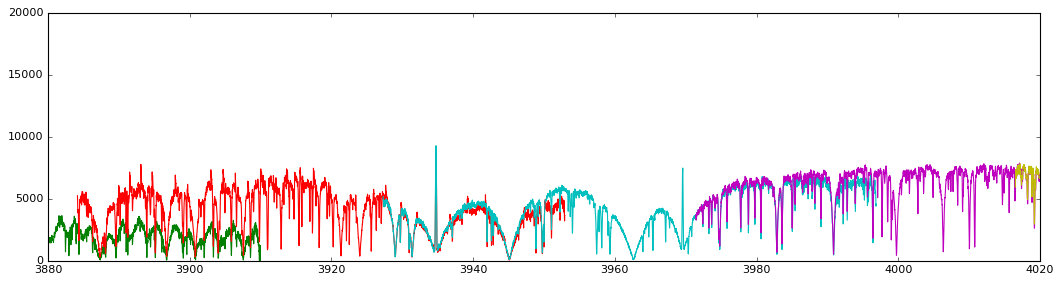

In [184]:
#Reading in a file and displaying available data

#for target in glob.glob() 'HI.20040823.25630_1_*_flux.fits'

V_files = sorted(glob.glob("Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050628.*_1_03_flux.fits"))
HK_files = sorted(glob.glob("Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050628.*_1_04_flux.fits"))
R_files = sorted(glob.glob("Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd1/flux/HI.20050628.*_1_05_flux.fits"))

i=1
c = 299792458e10
RV_conv = -1.07 * 10 ** 13 / c
plt.figure(figsize=(16,4))
for index in range(len(V_files)):
    row3 = V_files[index]
    hdu3 = pyfits.open(row3)
    wave3 = hdu3[1].data["wave"] - hdu3[1].data["wave"]*RV_conv
    #print fn
    #plt.text(hdu[1].data["wave"][0], hdu[1].data["flux"][0], i)
    plt.plot(hdu[1].data["wave"] - hdu[1].data['wave']*RV_conv,hdu[1].data['flux'])
    i=i+1

#plt.xlim(3930,3940)
plt.xlim(3880,4020)
plt.ylim(0,20000)
#plt.xlim(6500,6550)
#plt.ylim(0,100000)
#plt.axvline(6562.8)

plt.show()

#hdu = pyfits.open("Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd0/flux/HI.19970602.47510_0_01_flux.fits")
#plt.plot(hdu[1].data['wave'],hdu[1].data['flux'])

In [35]:
#Reading in a file and displaying available data

#for target in glob.glob() 'HI.20040823.25630_1_*_flux.fits'

V_file = glob.glob("Spectra/HD173739/HI.20070527.47727.fits/HI.20070527.47727_1_03_flux.fits")
HK_file = glob.glob("Spectra/HD173739/HI.20070527.47727.fits/HI.20070527.47727_1_04_flux.fits")
R_file = glob.glob("Spectra/HD173739/HI.20070527.47727.fits/HI.20070527.47727_1_05_flux.fits")

hdu3 = pyfits.open(V_file[0])
hdu3[0].header

SIMPLE  =                    T / Java FITS: Wed May 21 21:05:33 HST 2008        
BITPIX  =                  -32                                                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
DATE    = '2007-05-27T13:23:36' /  file creation date (YYYY-MM-DDThh:mm:ss UT)  
DETCNFID=                 1002 / mosaic detector configuration Id               
DETCNFIG= 'HIRES Science mosaic' /  mosaic detector configuration               
MOSAIC  = 'HIRES Science Mosaic' /  mosaic detector                             
MOSDESIN= 'HIRES Mosaic'       /  mosaic detector design                        
AMPWIRES= 'HIRES Wiring, 6-amplifier' /  mosaic amplifier wiring                
VIDEOINP=                    2 / see HIRES engineering drawing H9604            
AMPLOC  = '2       '           /  see HIRES engineering drawing H9604           
AMPTYPE = 'B       '        

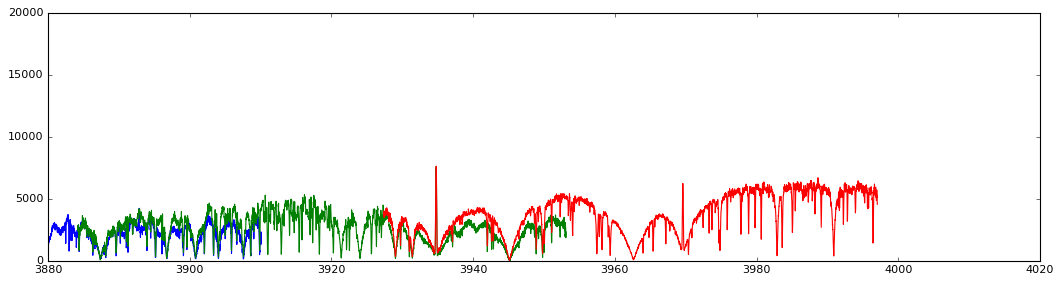

In [16]:
c = 299792458e10
RV_conv = -1.07 * 10 ** 13 / c
plt.figure(figsize=(16,4))
hdu3 = pyfits.open(V_file[0])
wave3 = hdu3[1].data["wave"] - hdu3[1].data["wave"]*RV_conv
flux3 = hdu3[1].data["flux"]
hdu4 = pyfits.open(HK_file[0])
wave4 = hdu4[1].data["wave"] - hdu4[1].data["wave"]*RV_conv
flux4 = hdu4[1].data["flux"]
hdu5 = pyfits.open(R_file[0])
wave5 = hdu5[1].data["wave"] - hdu5[1].data["wave"]*RV_conv
flux5 = hdu5[1].data["flux"]
plt.plot(wave3, flux3)
plt.plot(wave4, flux4)
plt.plot(wave5, flux5)

#plt.xlim(3930,3940)
plt.xlim(3880,4020)
plt.ylim(0,20000)
#plt.xlim(6500,6550)
#plt.ylim(0,100000)
#plt.axvline(6562.8)

plt.show()

#hdu = pyfits.open("Spectra/HD173739/KOA_10255/HIRES/extracted/binaryfits/ccd0/flux/HI.19970602.47510_0_01_flux.fits")
#plt.plot(hdu[1].data['wave'],hdu[1].data['flux'])

In [17]:
import coaddx1d as cx
spec = cx.coadd(path="Spectra/HD173739/HI.20050628.32558.fits/", chan=3, savefile=True, saveformat="pickle")
test

ImportError: No module named coaddx1d

In [35]:
from astropy.spectrum import Spectrum
def coadd_errorweighted(spectra, dispersion=None, **kwargs):
    '''A simple way to coadd several spectra

    All spectra are interpolated to ``dispersion`` and for each wavelengths bin the
    mean over all n spectra is calculated. The reported uncertainty is just the mean
    of all uncertainties scaled by 1/sqrt(n).
    Nan values are ignored in the calculation of the mean. Thus, this method can be used
    if not all spectra have the same wavelength range. Supply the keyword
    ``bounds_error=False``, so that the interpolation returns ``nan`` outside the range
    covered by the spectrum.
        

    Parameters
    ----------
    spectra : list of :class:`~spectrum.Spectrum` instances
        spectra to be averaged
    dispersion : :class:`~astropy.quantity.Quantity`
        dispersion axis of the new spectrum. If ``None`` the dispersion axis of the 
        first spectrum in ``spectra`` is used.
    
    All other parameters are passed to :meth:`~spectrum.Spectrum.interpol`.

    Returns
    -------
    spec : :class:`~spectrum.Spectrum`

    See also
    --------
    coadd_simple
    '''
    if dispersion is None:
        dispersion = spectra[0].disp
    fluxes = np.ma.zeros((len(spectra), len(dispersion)))
    # since numpy operation will destroy the flux unit, need to convert here by hand 
    # until that is fixed (fluxes can be NDdata once that works with quantities)
    fluxunit = spectra[0].flux.unit
    errors = np.zeros_like(fluxes)
    for i, s in enumerate(spectra):
        s_new = s.interpol(dispersion, **kwargs)
        fluxes[i,:] = s_new.flux.to(fluxunit)
        if s.uncertainty is None:
            raise ValueError('s.uncertainty needs to be set for every spectrum')
        else:
            errors[i,:] = s_new.error.to(fluxunit)

    # First, make sure there is no flux defined if there is no error.
    errors = np.ma.fix_invalid(errors)
    if np.ma.is_masked(errors):
        fluxes[errors.mask] = np.ma.masked
    # This can be simplified considerably as soon as masked quantities exist.
    fluxes = np.ma.fix_invalid(fluxes)
    # There are no masked quantities yet, so make sure they are filled here.
    fluxes = np.ma.average(fluxes, axis=0, weights = 1./errors**2.).filled(np.nan) * fluxunit
    errors = np.sqrt(1. / np.ma.sum(1./errors**2., axis=0).filled(np.nan)) * fluxunit
    # check explicitly here every time, because that makes hard to find bugs and 
    # astropy quantity behaviour might change.
    assert not np.ma.isMaskedArray(fluxes)
    assert not np.ma.isMaskedArray(errors) 

    return Spectrum(data=[dispersion, fluxes, errors],
                       names=[spectra[0].dispersion, 'FLUX', spectra[0].uncertainty], 
                   dispersion=spectra[0].dispersion, uncertainty=spectra[0].uncertainty,
                       )

ImportError: No module named spectrum

In [33]:
coadd_errorweighted(spectra)

AttributeError: 'str' object has no attribute 'disp'

In [41]:
eso = hdu[0].header["DATE-OBS "]
eso_date, eso_time = eso.split("T")
print(eso_date, eso_time)

('2008-10-10', '03:10:42.757')


In [43]:
keck_date = hdu3[0].header["DATE-OBS "]
keck_time = hdu3[0].header["UTC "]
print(keck_date, keck_time)

('2007-05-27', '13:15:27.87')


In [23]:
#Reading in a file and displaying available data

#for target in glob.glob() 'HI.20040823.25630_1_*_flux.fits'

V_file = glob.glob("Spectra/HD173739/HI.20070527.47727.fits/HI.20070527.47727_1_03_flux.fits")
HK_file = glob.glob("Spectra/HD173739/HI.20070527.47727.fits/HI.20070527.47727_1_04_flux.fits")
R_file = glob.glob("Spectra/HD173739/HI.20070527.47727.fits/HI.20070527.47727_1_05_flux.fits")

hdu3 = pyfits.open(V_file[0])
hdu3[0].header

SIMPLE  =                    T / Java FITS: Wed May 21 21:05:33 HST 2008        
BITPIX  =                  -32                                                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
DATE    = '2007-05-27T13:23:36' /  file creation date (YYYY-MM-DDThh:mm:ss UT)  
DETCNFID=                 1002 / mosaic detector configuration Id               
DETCNFIG= 'HIRES Science mosaic' /  mosaic detector configuration               
MOSAIC  = 'HIRES Science Mosaic' /  mosaic detector                             
MOSDESIN= 'HIRES Mosaic'       /  mosaic detector design                        
AMPWIRES= 'HIRES Wiring, 6-amplifier' /  mosaic amplifier wiring                
VIDEOINP=                    2 / see HIRES engineering drawing H9604            
AMPLOC  = '2       '           /  see HIRES engineering drawing H9604           
AMPTYPE = 'B       '        

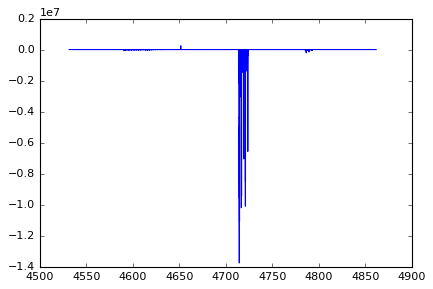

In [97]:
merged_file = sorted(glob.glob("Spectra/K2-25/HI.20151003.45804_1.fits/*.txt"))
#print(merged_file)

#hdu = pyfits.open(merged_file[16])
#print(merged_file[0])
#hdu.info()
#wave = hdu[1].data["wave"]
#flux = hdu[1].data["flux"]
#print(hdu[1].data["wave"])

wave = np.genfromtxt(merged_file[0], usecols=0)
flux = np.genfromtxt(merged_file[0], usecols=1)

plt.plot(wave, flux)
#plt.xlim(3800,4100)
#plt.ylim(0,500)
#plt.xlim(6500,6600)

# COS Data

In [98]:
hdu = pyfits.open("Spectra/GJ628/lck136uwq_x1d.fits")
hdu.info()

Filename: Spectra/GJ628/lck136uwq_x1d.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     179   ()              
1    SCI         BinTableHDU    337   2R x 20C     [4A, 1D, 1J, 16384D, 16384E, 16384E, 16384E, 16384E, 16384E, 16384E, 16384I, 16384E, 16384I, 16384E, 16384I, 16384D, 16384D, 16384D, 16384D, 16384D]   


In [99]:
wave1 = hdu[1].data["WAVELENGTH"]
print(wave)

[ 4531.6695      4531.6795      4531.6895     ...,  4861.75950001
  4861.76950001  4861.77950001]


In [100]:
wave1 = hdu[1].data["WAVELENGTH"][0]
wave2 = hdu[1].data["WAVELENGTH"][1]
flux1 = hdu[1].data["FLUX"][0]
flux2 = hdu[1].data["FLUX"][1]
err = hdu[1].data["ERROR"]
#print(flux)

(1638, 1644)

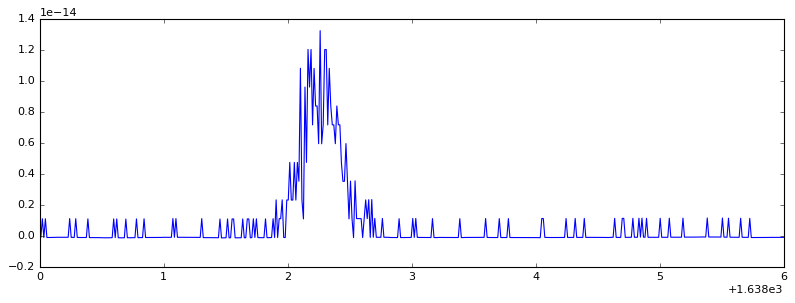

In [108]:
plt.figure(figsize=(12,4))
plt.plot(wave1, flux1)
#plt.plot(wave2, flux2)
#plt.errorbar(wave, flux, yerr=err)
plt.xlim(1638,1644)
#plt.ylim(-1e-16,1e-14)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from PyAstronomy import pyasl
import pyfits, time
import matplotlib.mlab as mlab
import pylab as py
import multiprocessing as mp
from multiprocessing import Pool, freeze_support
import itertools
import random
from astropy.modeling.models import Voigt1D

#Defining a function to fit the gaussian
def gaussian(x, amp, cen, wid, c):
    return amp*np.exp(-(x-cen)**2/(2*wid**2)) + c

def voigt(x, amp, cen, wid_L, wid_G, c):
    v_func = Voigt1D(x_0=cen, amplitude_L=amp, fwhm_L=wid_L, fwhm_G=wid_G)
    return v_func(x) + c

#v = Voigt1D(x_0=1394, amplitude_L=1e-14, fwhm_L=1, fwhm_G=1)

popt, pcov = curve_fit(voigt, wave[(wave<1400) & (wave>1380)], flux[(wave<1400) & (wave>1380)], 
                       sigma=1/(err[(wave<1400) & (wave>1380)]**2),
                       p0 = [1e-14, 1394, 1, 1, 0])

In [9]:
print popt
print pcov

#params = voigt(wave)

[  7.05233651e-15   1.39388894e+03   1.57855532e-01   5.56715228e-02
   7.72122384e-17]
[[  3.74827714e-32   2.32289654e-21  -1.30861155e-18   2.03920231e-18
    1.05699098e-33]
 [  2.32289654e-21   2.41362861e-07  -8.03123582e-08   1.25842836e-07
    2.60481018e-23]
 [ -1.30861155e-18  -8.03123582e-08   4.91764086e-05  -7.21068065e-05
   -6.87357323e-20]
 [  2.03920231e-18   1.25842836e-07  -7.21068065e-05   1.16252598e-04
    7.84469366e-20]
 [  1.05699098e-33   2.60481018e-23  -6.87357323e-20   7.84469366e-20
    5.26163943e-34]]


(0, 1e-14)

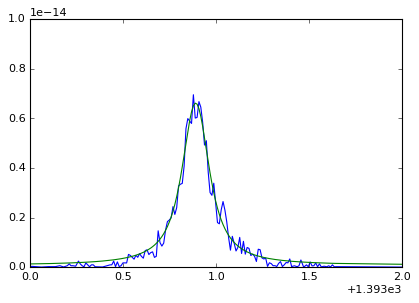

In [10]:
plt.figure()
plt.plot(wave, flux)
plt.plot(wave, voigt(wave, popt[0], popt[1], popt[2], popt[3], popt[4]))
plt.xlim(1393,1395)
plt.ylim(0,1e-14)